In [2]:
import pandas as pd
import numpy as np


In [3]:
pip install lazypredict


Note: you may need to restart the kernel to use updated packages.


In [1]:
import lazypredict

In [4]:
#Import ecommerce datasets

import pandas as pd
df1 = pd.read_csv("/Users/tomilayoibrahim/Desktop/ecommerce_shop/2019_Dec.csv")
df2 = pd.read_csv("/Users/tomilayoibrahim/Desktop/ecommerce_shop/2019_Nov.csv")
df3 = pd.read_csv("/Users/tomilayoibrahim/Desktop/ecommerce_shop/2019_Oct.csv")
df4 = pd.read_csv("/Users/tomilayoibrahim/Desktop/ecommerce_shop/2020_Feb.csv")
df5 = pd.read_csv("/Users/tomilayoibrahim/Desktop/ecommerce_shop/2020_Jan.csv")


In [5]:
#Merge ecommerce store 5-mnth period data
ecommdf = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#check how much data ecommdf contains
len(ecommdf)
ecommdf.shape

(20692840, 9)

In [7]:
ecommdf.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [8]:
#Display attributes and datatypes
ecommdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20692840 entries, 0 to 4264751
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.5+ GB


In [9]:
#Describe ecommdf
ecommdf.describe()

,product_id,category_id,price,user_id
count,2.069284e+07,2.069284e+07,2.069284e+07,2.069284e+07
mean,5.484297e+06,1.554230e+18,8.534735e+00,5.215527e+08
std,1.305716e+06,1.691038e+17,1.938142e+01,8.744312e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724650e+06,1.487580e+18,2.060000e+00,4.818306e+08
50%,5.810720e+06,1.487580e+18,4.050000e+00,5.531297e+08
75%,5.857864e+06,1.487580e+18,7.060000e+00,5.788573e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


In [15]:
#Describe ecommdf
ecommdf.describe(include=np.object)

,event_time,event_type,category_code,brand,user_session
count,20692840,20692840,353594,11935723,20688242
unique,8782890,4,12,273,4535941
top,2020-02-15 16:08:37 UTC,view,appliances.environment.vacuum,runail,74206ba1-c863-4760-bbdc-b11777059e46
freq,3087,9657821,149168,1528908,5411


In [10]:
ecommdf['event_type'].value_counts()

view                9657821
cart                5768333
remove_from_cart    3979679
purchase            1287007
Name: event_type, dtype: int64

In [11]:
#matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'value_count (10,000)')

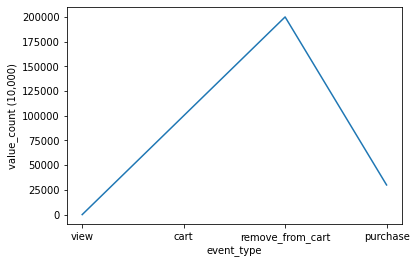

In [12]:
event_type = ['view', 'cart', 'remove_from_cart', 'purchase']
value_counts= [0,100000, 200000, 30000]

plt.plot(event_type, value_counts)
plt.xlabel('event_type')
plt.ylabel('value_count (10,000)')

In [13]:
#Popular Product 
ecommdf['product_id'].value_counts()

5809910    141650
5809912     55606
5700037     51111
5802432     45008
5854897     44799
            ...  
5679334         1
5679343         1
5679339         1
5695581         1
5616969         1
Name: product_id, Length: 54571, dtype: int64

In [14]:
#Best selling brands
Best_selling_brands = ecommdf['brand'].value_counts()
Best_selling_brands.head(10)


runail       1528908
irisk        1033852
masura        861763
grattol       852591
bpw.style     434813
ingarden      430958
estel         360912
kapous        324394
jessnail      252996
uno           250377
Name: brand, dtype: int64

Text(0, 0.5, 'value_counts (10,000)')

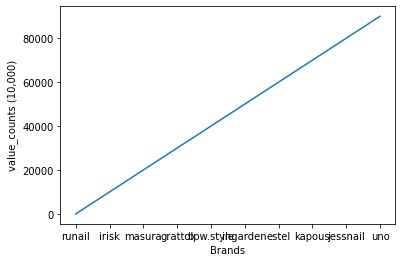

In [52]:
#######Best_selling_brands = ['runail', 'irisk', 'masura', 'grattol','bpw.style', 'ingarden','estel','kapous','jessnail','uno']
value_counts = [0,10000, 20000, 30000, 40000,50000,60000,70000,80000,90000]

plt.plot(Best_selling_brands, value_counts)
plt.xlabel('Brands')
plt.ylabel('value_counts (10,000)')

In [15]:
ecommdf['event_type'].value_counts()

view                9657821
cart                5768333
remove_from_cart    3979679
purchase            1287007
Name: event_type, dtype: int64

In [18]:
#Products Purchased by Brand Name

Products_purchased = ecommdf.loc[ecommdf.event_type == 'purchase']
Products_purchased


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
557,2019-12-01 00:17:50 UTC,purchase,4554,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
558,2019-12-01 00:17:50 UTC,purchase,4600,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
559,2019-12-01 00:17:50 UTC,purchase,4607,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
560,2019-12-01 00:17:50 UTC,purchase,4640,1487580011157258342,NaN,runail,0.37,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
561,2019-12-01 00:17:50 UTC,purchase,4689,1487580010796548183,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
...,...,...,...,...,...,...,...,...,...
4264714,2020-01-31 23:58:26 UTC,purchase,5730206,1487580005092295511,NaN,NaN,10.32,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e
4264715,2020-01-31 23:58:26 UTC,purchase,5861342,1487580010645553231,NaN,NaN,1.90,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e
4264716,2020-01-31 23:58:26 UTC,purchase,5867185,1487580007910867929,NaN,staleks,11.43,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e
4264717,2020-01-31 23:58:26 UTC,purchase,5877766,1605161575889502297,NaN,NaN,4.76,604470329,6f853f2d-e1aa-49d4-84d8-284566ea1a0e


In [19]:
#Top 50 selling Brands
Best_selling_brands = Products_purchased.groupby('brand').brand.agg([len]).sort_values(by= 'len', ascending = False)
Best_selling_brands.head(50)

,len
brand,
runail,111408
irisk,73806
masura,49751
grattol,49542
bpw.style,37943
ingarden,27411
estel,19438
uno,17586
freedecor,17467


In [20]:
#Top 50 Users (Customers)
Top_customers = Products_purchased.groupby('user_id').user_id.agg([len]).sort_values(by= 'len', ascending = False)
Top_customers.head(50)

,len
user_id,
480463194,715
469299888,603
556579890,506
381816972,500
601469771,461
557790271,438
473313149,417
517825140,412
247216055,409


In [21]:
#Best time users make purchases( to target them with recommendations and adverts)
Best_sales_time = Products_purchased.groupby('event_time').event_time.agg([len]).sort_values(by= 'len', ascending = False)
Best_sales_time.head(20)

,len
event_time,
2020-02-09 20:10:58 UTC,429
2020-02-26 05:38:37 UTC,324
2020-02-20 14:59:05 UTC,282
2019-11-18 01:17:08 UTC,279
2019-12-02 14:12:08 UTC,260
2020-01-09 09:06:06 UTC,257
2019-11-07 12:31:32 UTC,252
2019-12-02 20:42:26 UTC,246
2020-02-13 14:28:17 UTC,240


In [22]:
#Exclude all rows where price have value less that 1.
ecommdf2= ecommdf[ecommdf.price >= 1]


In [23]:
#Drop category_code because it has over 90% NAs
ecommdf3= ecommdf2.drop(['category_code'], axis=1)
ecommdf3.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95


In [24]:
#import matplotlab
import matplotlib.pyplot as plt

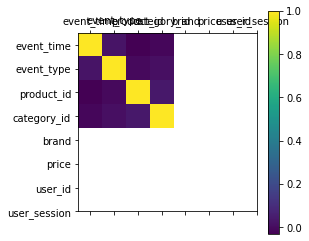

In [25]:
plt.matshow(ecommdf3.corr())
plt.xticks(range(len(ecommdf3.columns)), ecommdf3.columns)
plt.yticks(range(len(ecommdf3.columns)), ecommdf3.columns)
plt.colorbar()
plt.show()

In [26]:
ecommdf3.corr()

,product_id,category_id,price,user_id
product_id,1.000000,0.021866,-0.030665,-0.014106
category_id,0.021866,1.000000,-0.003304,0.013431
price,-0.030665,-0.003304,1.000000,0.036393
user_id,-0.014106,0.013431,0.036393,1.000000


In [28]:
#In order to build the recommendation model, even_type will be ranked in order of interest as ratings and stored in a new column. 'remove_from_cart':1, 'view':2, 'cart': 3, 'purchase': 3})

ecommdf3['rating']= ecommdf3['event_type'].map({'remove_from_cart':1, 'view':2, 'cart': 3, 'purchase': 3})
ecommdf3.head(20)

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,rating
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,3
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2
5,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95,2
6,2019-12-01 00:00:18 UTC,cart,5629988,1487580009311764506,NaN,1.19,579966747,1512be50-d0fd-4a92-bcd8-3ea3943f2a3b,3
7,2019-12-01 00:00:22 UTC,view,5807805,1487580005713052531,ingarden,4.44,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2
8,2019-12-01 00:00:27 UTC,view,5588608,1487580008145748965,roubloff,5.40,546170008,676d9fcc-2a4f-4448-b49d-136f2e4208c1,2
10,2019-12-01 00:00:40 UTC,cart,5755170,1487580009387261981,NaN,2.79,579751441,8de492d7-0937-47ae-be2c-a7615aec2b0d,3
11,2019-12-01 00:00:44 UTC,remove_from_cart,5650294,1487580007835370453,metzger,3.33,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1
